In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
#df.head(5)

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Drop invalid data 
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
#len(df)
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
#len(df)
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
#len(df)
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
#len(df)
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [3]:
# There are 7 different delployment in total
name=df.deployment_name.unique()
print(name)

['TwoRocks20130215' 'Leeuwin20131017' 'AIMS20151127'
 'LizardIsland20131024' 'SpencerGulf20131031' 'TwoRocks20140808'
 'StormBay20141017']


In [12]:
# Delete invalid columns VCUR,UCUR and NTRA
Liz_13 = df[df['deployment_name'] == 'LizardIsland20131024']
del Liz_13['NTRA']
del Liz_13['UCUR']
del Liz_13['VCUR']

from numpy import where
from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, xlabel, ylabel, title, show

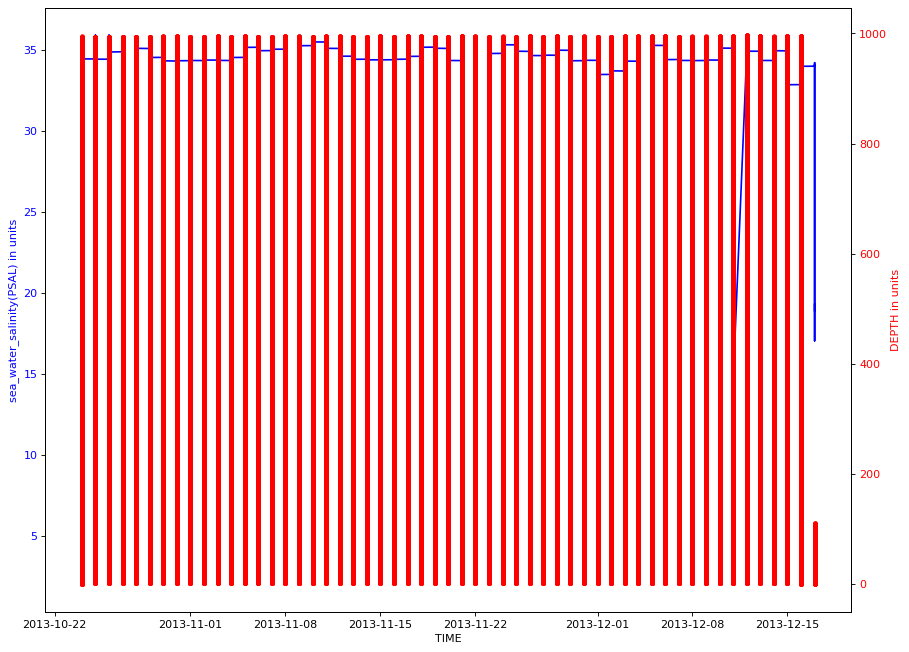

In [5]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(Liz_13['TIME']).dt.date.values
psalData = Liz_13['PSAL'].values
depthData = Liz_13['DEPTH'].values

# plot depth and salinity(psal) timeseries
figure1 = figure( figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,psalData, 'b-')
ax1.set_xlabel('TIME')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('sea_water_salinity(PSAL)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

show()

In [13]:
# PSAL: sea_water_salinity

# Find the unique value in PSAL_quality_control
psalQ = Liz_13.PSAL_quality_control.unique()
print(psalQ)

psalMissing = Liz_13.loc[df['PSAL_quality_control'] == 9.]
psalBad = Liz_13.loc[df['PSAL_quality_control'] == 4.]
print("the number of bad quality data is",len(psalBad))
print("the ratio of bad quality data v.s. total data is",round(len(psalBad)/len(Liz_13),3))
print("the number of missing value data is",len(psalMissing))
print("the ratio of missing value data v.s. total data is",round(len(psalMissing)/len(Liz_13),3))

# The percentage of bad data and missing value data is low, we could just delete them
# Update the Liz_13
Liz_13 = Liz_13[(Liz_13['PSAL_quality_control'] != 9.)]
Liz_13 = Liz_13[(Liz_13['PSAL_quality_control'] != 4.)]

[9. 0. 1. 3. 4.]
the number of bad quality data is 7
the ratio of bad quality data v.s. total data is 0.0
the number of missing value data is 731
the ratio of missing value data v.s. total data is 0.002


In [16]:
# PROFILE: glider_trajectory_profile_number

proQ = Liz_13.PROFILE_quality_control.unique()
print('the quality type of PROFILE are',proQ)
proMissing=Liz_13.loc[df['PROFILE_quality_control'] == 9.]
print("the number of missing value data is",len(proMissing))
print("the ratio of missing value data v.s. total data is",round(len(proMissing)/len(Liz_13),3))

# Only a small percentage of data is missing value, we could just delete them 
Liz_13 = Liz_13[(Liz_13['PROFILE_quality_control'] != 9.)]

the quality type of PROFILE are [0. 9.]
the number of missing value data is 2
the ratio of missing value data v.s. total data is 0.0


In [18]:
# DOX2:standard_name: moles_of_oxygen_per_unit_mass_in_sea_water

dox2Q = Liz_13.DOX2_quality_control.unique()
print('the quality type of DOX2 are',dox2Q)
dox2missing = Liz_13.loc[df['DOX2_quality_control'] == 9.]
print('number of missing value is:',len(dox2missing),'and the pecentage is',round(len(dox2missing)/len(Liz_13),4)*100,'%')



the quality type of DOX2 are [9. 0. 3. 1.]
number of missing value is: 241027 and the pecentage is 50.06 %


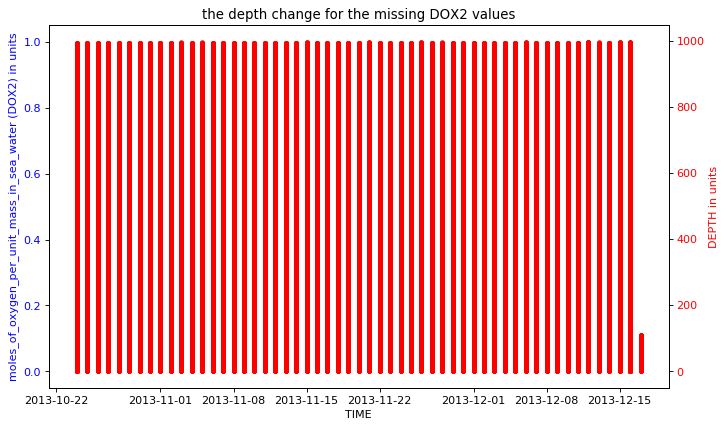

In [19]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(dox2missing['TIME']).dt.date.values
dox2Data = dox2missing['DOX2'].values
depthData = dox2missing['DEPTH'].values

# plot depth and DOX2 missing value timeseries
figure1 = figure(figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,dox2Data, 'b-')
ax1.set_xlabel('TIME')
ax1.set_title('the depth change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

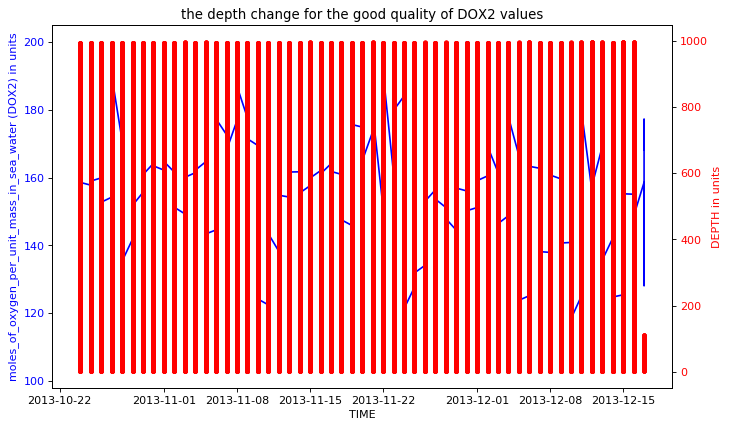

In [20]:
# good quality DOX2
dox2Valid=Liz_13.loc[df['DOX2_quality_control'] == 1.]
TIME = pd.to_datetime(dox2Valid['TIME']).dt.date.values
dox2vData = dox2Valid['DOX2'].values
depthvData = dox2Valid['DEPTH'].values

# plot depth and DOX2 good quality data timeseries
figure2 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax3 = figure2.add_subplot(111)
ax3.plot(TIME,dox2vData, 'b-')
ax3.set_xlabel('TIME')
ax3.set_title('the depth change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax3.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax3.get_yticklabels():
    t3.set_color('b')

ax4 = ax3.twinx()
ax4.plot(TIME,depthvData, 'r.')
ax4.set_ylabel('DEPTH' + ' in units', color='r')
for t4 in ax4.get_yticklabels():
    t4.set_color('r')

show()

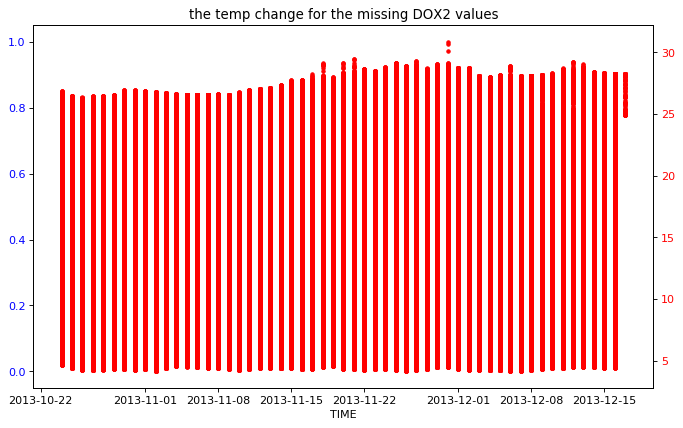

In [21]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(dox2missing['TIME']).dt.date.values
dox2Data = dox2missing['DOX2'].values
tempData = dox2missing['TEMP'].values

# plot depth and DOX2 missing value timeseries
figure3 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax5 = figure3.add_subplot(111)
ax5.plot(TIME,dox2Data, 'b-')
ax5.set_xlabel('TIME')
ax5.set_title('the temp change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax5.get_yticklabels():
    tl.set_color('b')

ax6 = ax5.twinx()
ax6.plot(TIME,tempData, 'r.')
ax2.set_ylabel('TEMP' + ' in units', color='r')
for tl in ax6.get_yticklabels():
    tl.set_color('r')
    

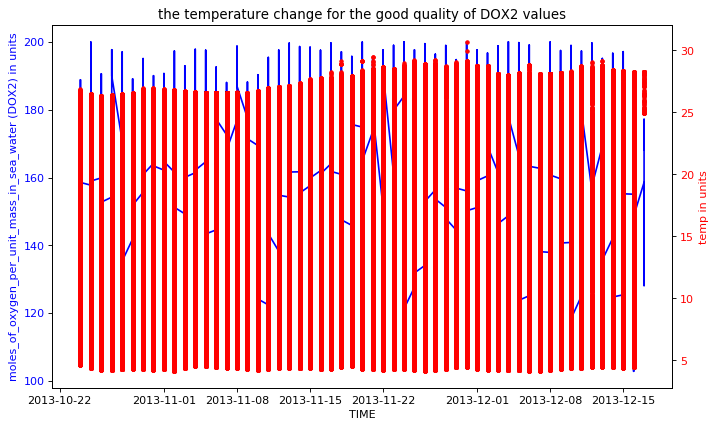

In [22]:
# good quality DOX2
dox2Valid=Liz_13.loc[df['DOX2_quality_control'] == 1.]
TIME = pd.to_datetime(dox2Valid['TIME']).dt.date.values
dox2vData = dox2Valid['DOX2'].values
tempvData = dox2Valid['TEMP'].values

# plot depth and DOX2 good quality data timeseries
figure4 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax6 = figure4.add_subplot(111)
ax6.plot(TIME,dox2vData, 'b-')
ax6.set_xlabel('TIME')
ax6.set_title('the temperature change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax6.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax6.get_yticklabels():
    t3.set_color('b')

ax7 = ax6.twinx()
ax7.plot(TIME,tempvData, 'r.')
ax7.set_ylabel('temp' + ' in units', color='r')
for t4 in ax7.get_yticklabels():
    t4.set_color('r')

show()

In [23]:
# Although we got 78.86% accuracy score from knn imputation, due to the extra lagre percentage of missing values
# from DOX2, we decided to delete them
Liz_13 = Liz_13[(Liz_13['DOX2_quality_control'] != 9.)]

In [27]:
#VBSC: volume_scattering_function
vbscQ = Liz_13.VBSC_quality_control.unique() 
print(vbscQ)
vbscBad= Liz_13.loc[df['VBSC_quality_control'] == 4.]
print('the number of bad_data for VBSC',len(vbscBad),', and the pecentage is',round(len(vbscBad)/len(Liz_13),4)*100,'%')
vbscMissing= Liz_13.loc[df['VBSC_quality_control'] == 9.]
print('the number of missing values for VBSC',len(vbscMissing),', and the pecentage is',round(len(vbscMissing)/len(Liz_13),4)*100,'%')
# Drop bad data and missing values, then update Lee_13
Liz_13 = Liz_13[(Liz_13['VBSC_quality_control'] != 4.)]
Liz_13 = Liz_13[(Liz_13['VBSC_quality_control'] != 9.)]

[0. 1. 9. 4.]
the number of bad_data for VBSC 2 , and the pecentage is 0.0 %
the number of missing values for VBSC 140286 , and the pecentage is 58.35 %


In [28]:
del Liz_13['NTRA_quality_control']
del Liz_13['UCUR_quality_control']
del Liz_13['VCUR_quality_control']
#UCUR can only be calculated when the glider is close to the surface and gets an updated GPS fix
#Thus UCUR_GPS and VCUR_GPS null value can be deleted

del Liz_13['UCUR_GPS']
del Liz_13['UCUR_GPS_quality_control']
del Liz_13['VCUR_GPS']
del Liz_13['VCUR_GPS_quality_control']
print(Liz_13.isnull().sum())

FID                               0
file_id                           0
deployment_name                   0
platform_type                     0
platform_code                     0
time_coverage_start               0
time_coverage_end                 0
TIME                              0
TIME_quality_control              0
LATITUDE                          0
LATITUDE_quality_control          0
LONGITUDE                         0
LONGITUDE_quality_control         0
PRES                              0
PRES_quality_control              0
DEPTH                             0
DEPTH_quality_control             0
PROFILE                           0
PROFILE_quality_control           0
PHASE                             0
PHASE_quality_control             0
TEMP                              0
TEMP_quality_control              0
PSAL                              0
PSAL_quality_control              0
DOX1                              0
DOX1_quality_control              0
DOX2                        

In [31]:
# IRRAD443, IRRAD490, IRRAD555, IRRAD670 are all missing values, thus, delete them all
del Liz_13['IRRAD443']
del Liz_13['IRRAD443_quality_control']
del Liz_13['IRRAD490']
del Liz_13['IRRAD490_quality_control']
del Liz_13['IRRAD555']
del Liz_13['IRRAD555_quality_control']
del Liz_13['IRRAD670']
del Liz_13['IRRAD670_quality_control']

In [33]:
print(Liz_13.isnull().sum())

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        0
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua

In [34]:
len(Liz_13)

100153

In [35]:
Liz_13.to_csv (r'LizardIsland20131024.csv', index = False, header=True)